<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/%E2%80%9EKD_tree_testing_ipynb%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


Load IRIS database and do Decision Tree clasification.

In [62]:
X, y = load_iris(return_X_y=True)
dtc_model = DecisionTreeClassifier(random_state=123)
dtc_model.fit(X, y)
text_representation = tree.export_text(dtc_model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



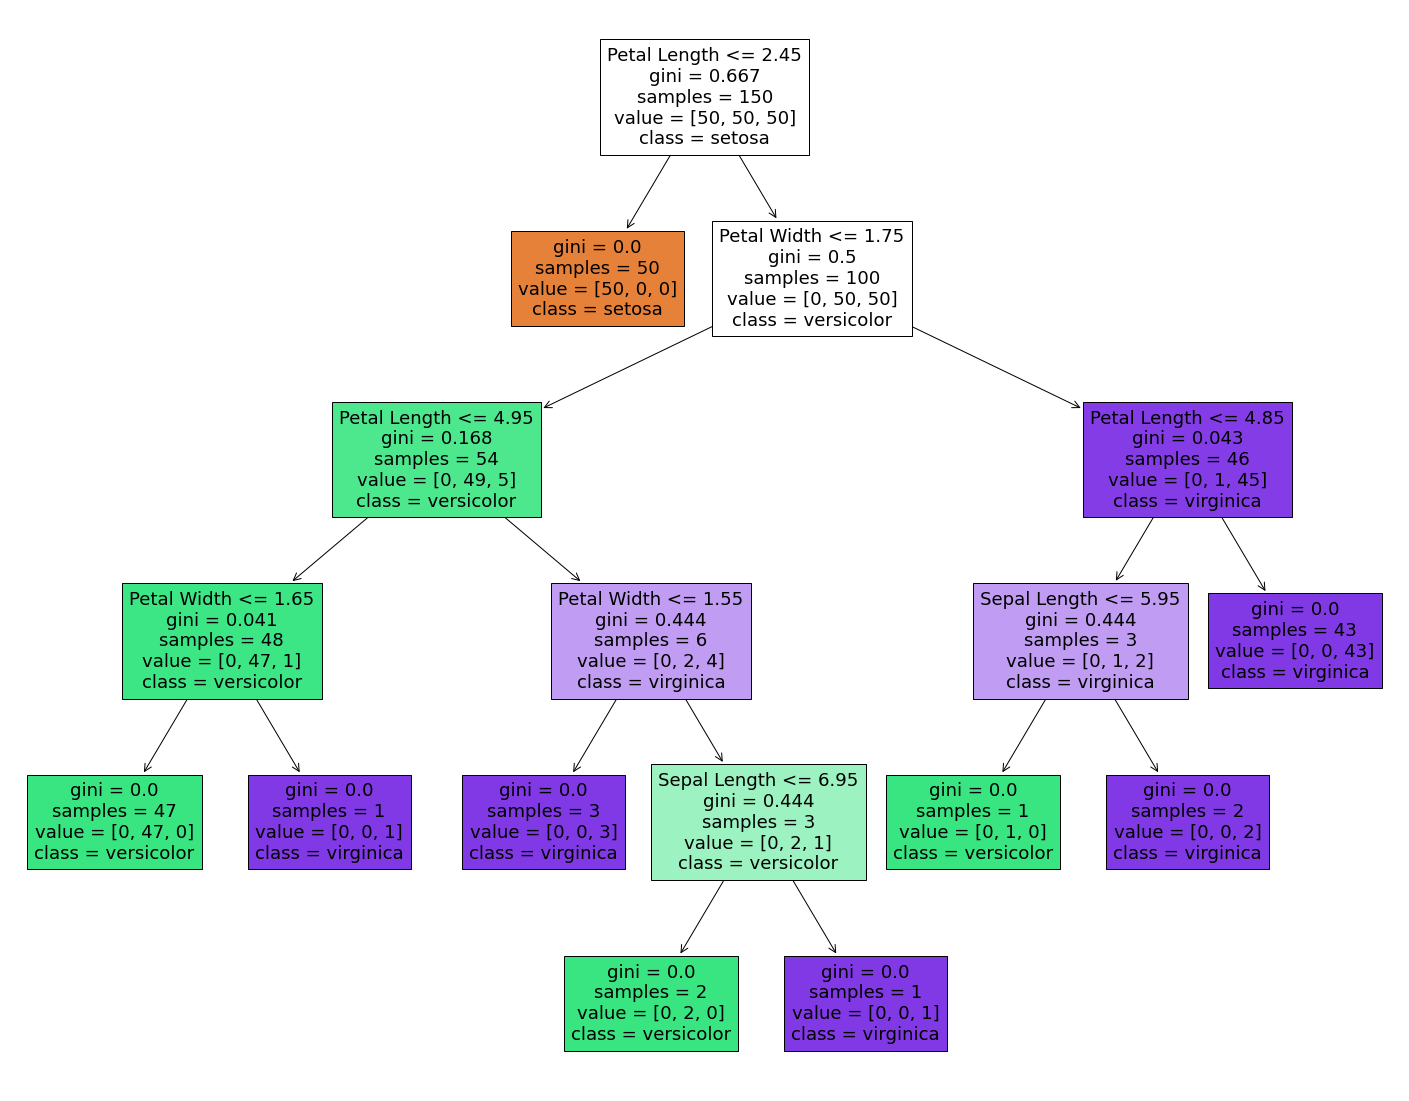

In [63]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_model, 
                   feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)


# **Visualize Decision Tree with graphviz**

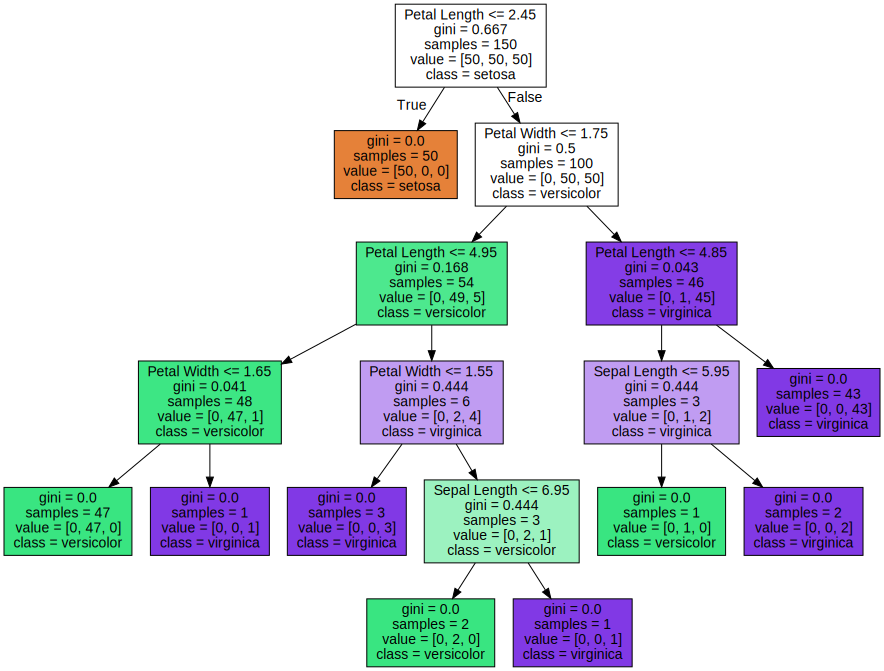

In [64]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtc_model, out_file=None, 
                                feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                                class_names=['setosa', 'versicolor', 'virginica'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## **Plot Decision Tree with dtreeviz Package**

In [65]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


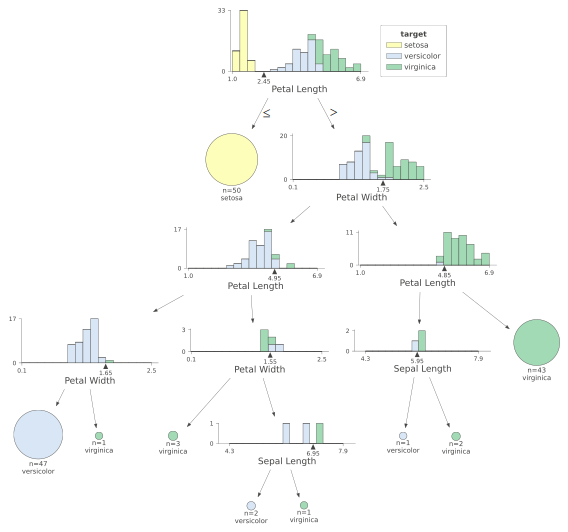

In [66]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtc_model, X, y,
                target_name="target",
                feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                class_names=list(['setosa', 'versicolor', 'virginica']))

viz

## *Let's do in correct way by spliting data into training, validation and testing sets with stratified spliting*


In [67]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)
np.bincount(y_temp)

array([40, 40, 40])

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, random_state=10, shuffle=True, stratify=y_temp)
X_train.shape

(96, 4)

Scaling data by normalisation.


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)
X_valid_std=scaler.transform(X_valid)

In [70]:
from sklearn.preprocessing import MinMaxScaler


In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)
X_valid_mm=scaler.transform(X_valid)

In [86]:
dtc_1 = DecisionTreeClassifier(random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_valid)
scores_dtc_1=metrics.accuracy_score(y_valid,y_pred)

dtc_1.fit(X_train_mm, y_train)
y_pred_mm = dtc_1.predict(X_valid_mm)
scores_dtc_mm=metrics.accuracy_score(y_valid,y_pred_mm)

dtc_1.fit(X_train_std, y_train)
y_pred_std = dtc_1.predict(X_valid_std)
scores_dtc_std=metrics.accuracy_score(y_valid,y_pred_std)


print('No_pp = ', scores_dtc_1, ";  MM = ", scores_dtc_mm, "; STD = ", scores_dtc_std)



No_pp =  0.9583333333333334 ;  MM =  0.9583333333333334 ; STD =  0.9583333333333334


Ans: No scaling influence....

Which criterion "gini" or "entropy" is better?

In [85]:
dtc_1 = DecisionTreeClassifier(criterion = 'gini', random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_valid)
scores_dtc_gini=metrics.accuracy_score(y_valid,y_pred)

dtc_1 = DecisionTreeClassifier(criterion = 'entropy', random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_valid)
scores_dtc_entropy=metrics.accuracy_score(y_valid,y_pred)


print('gini = ', scores_dtc_gini, ";  entropy = ", scores_dtc_entropy)

gini =  0.9583333333333334 ;  entropy =  1.0


How the depth influences the error?

In [84]:
dtc_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth =2, random_state=123)
dtc_1.fit(X_train, y_train)
y_pred = dtc_1.predict(X_valid)
scores_dtc_2=metrics.accuracy_score(y_valid,y_pred)

dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, random_state=123)
dtc_2.fit(X_train, y_train)
y_pred = dtc_2.predict(X_valid)
scores_dtc_4=metrics.accuracy_score(y_valid,y_pred)


print('2 = ', scores_dtc_2, ";  4 = ", scores_dtc_4)

2 =  0.9166666666666666 ;  4 =  1.0


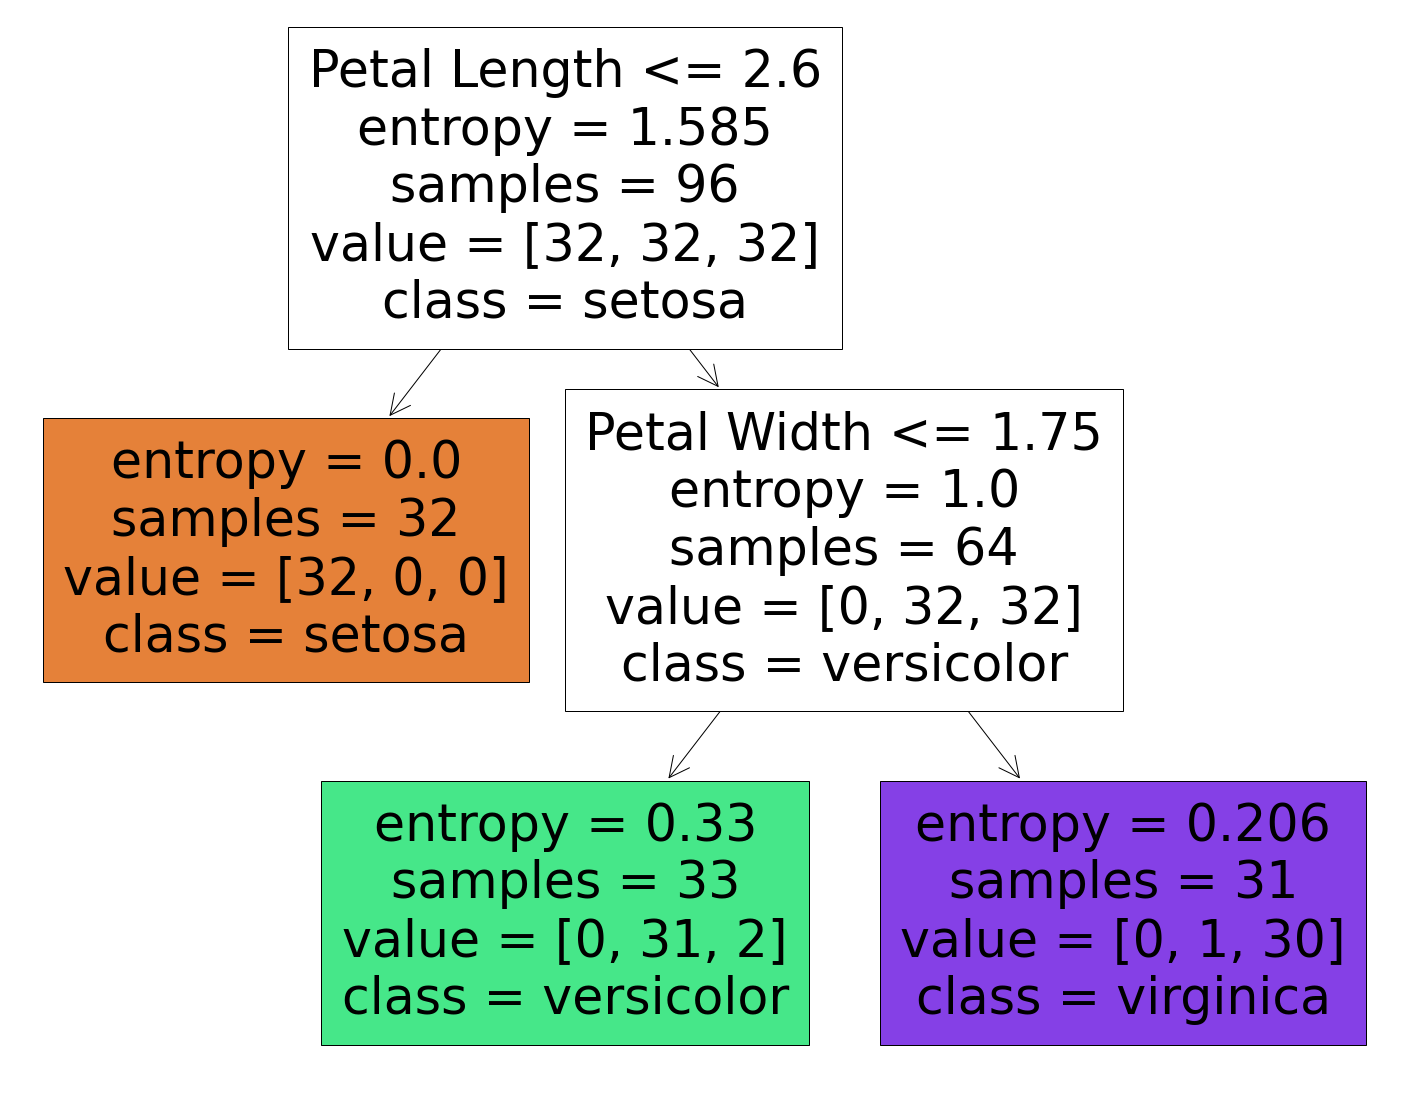

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_1, 
                   feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

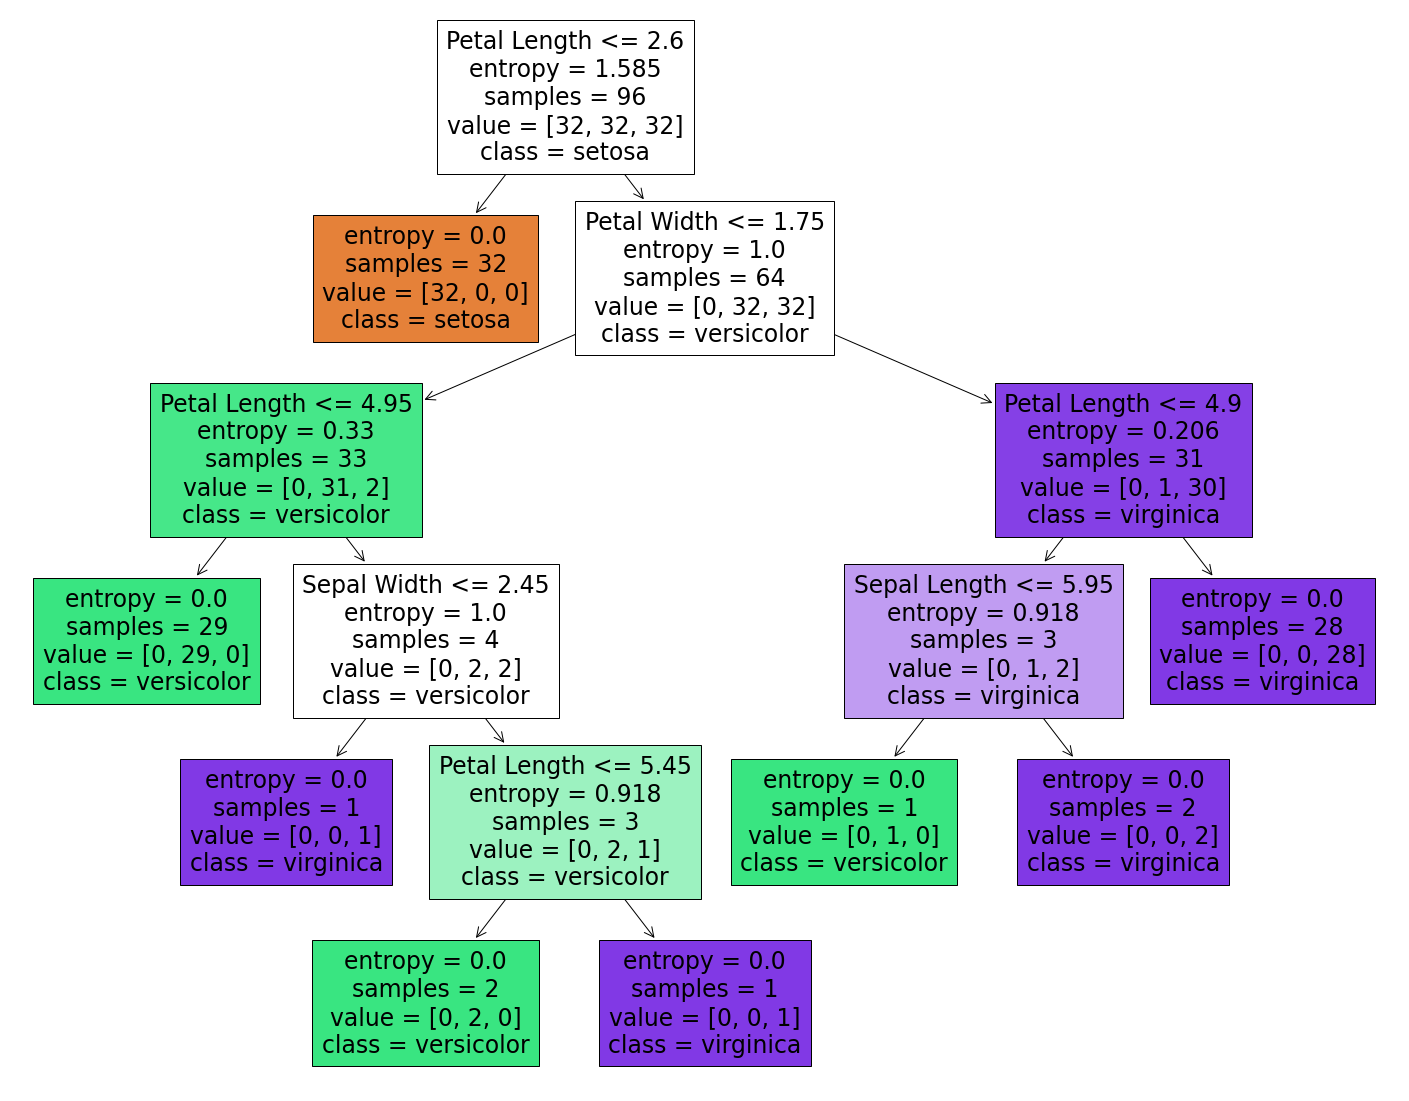

In [76]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_2, 
                   feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

# **Pruning tree complexity** (by: https://ranvir.xyz/blog/practical-approach-to-tree-pruning-using-sklearn/)


In [77]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, random_state=123)
path = dtc_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.02083333, 0.02869674, 0.0376925 , 0.07171792,
        0.48689283, 0.91829583]),
 'impurities': array([0.        , 0.04166667, 0.07036341, 0.10805591, 0.17977383,
        0.66666667, 1.5849625 ])}

Text(0, 0.5, 'total impurity of leaves')

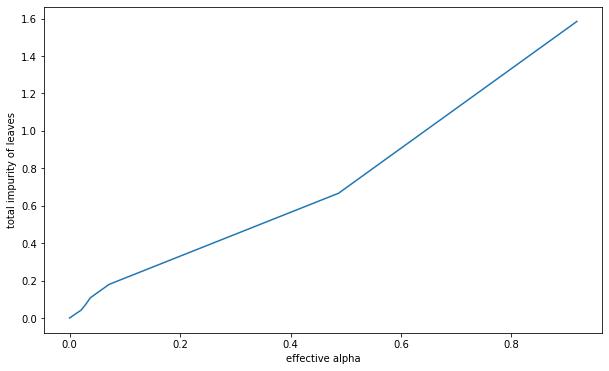

In [78]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

Text(0, 0.5, 'total depth')

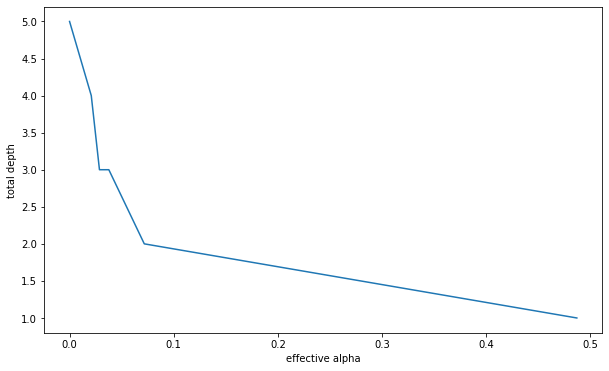

In [79]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
  
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

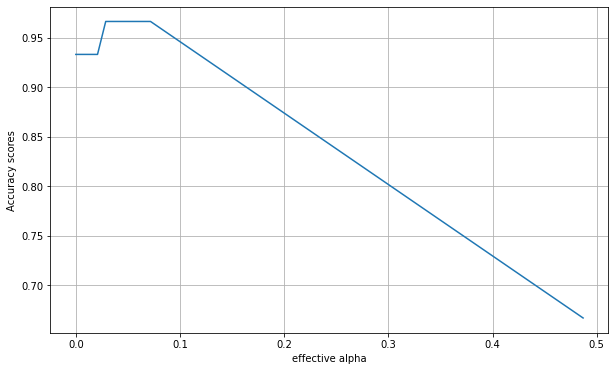

In [80]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

CART Classification Feature Importance

Feature: 0, Score: 0.01811
Feature: 1, Score: 0.00818
Feature: 2, Score: 0.66652
Feature: 3, Score: 0.30720


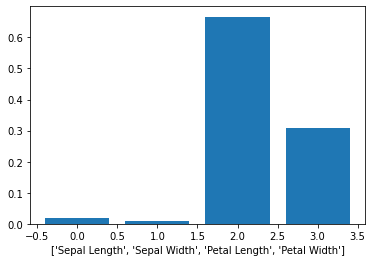

In [83]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, random_state=123)
dtc_2.fit(X_train, y_train)
# get importance
importance = dtc_2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()